In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from src.models import SIRM, SIRT, SIRV
from src.utils.batch_sweep import sweep_two_parameters

from src.utils.visualization import *
from src.utils.visualization.core import Lx, Ly
import numpy as np

CH = ["#00441b", "#238b45", "#000", "#66c2a4", "#99d8c9"]       # used for fixed homophily
CP = ["#000", "#7f0000", "#d7301f", "#fc8d59", "#fdbb84"]       # used for fixed polarization

In [3]:
NB = 100
NP = 100

homophilic_tendency = {"m": -5, "M": 5, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}
fixed_mean = 0.7
custom_base_params = {
        'beta_M': 0.3,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        "fixed_mean": fixed_mean,  # Add the fixed mean to params for the param_updater function
        # parameters for SIRM
        'mu_max': 1,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/3,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.025      # Set maximum VR to 0.025
    }


Model: SIRM
Parameter 1: polarization
Parameter 2: homophilic_tendency
Shape of results: (10, 10)


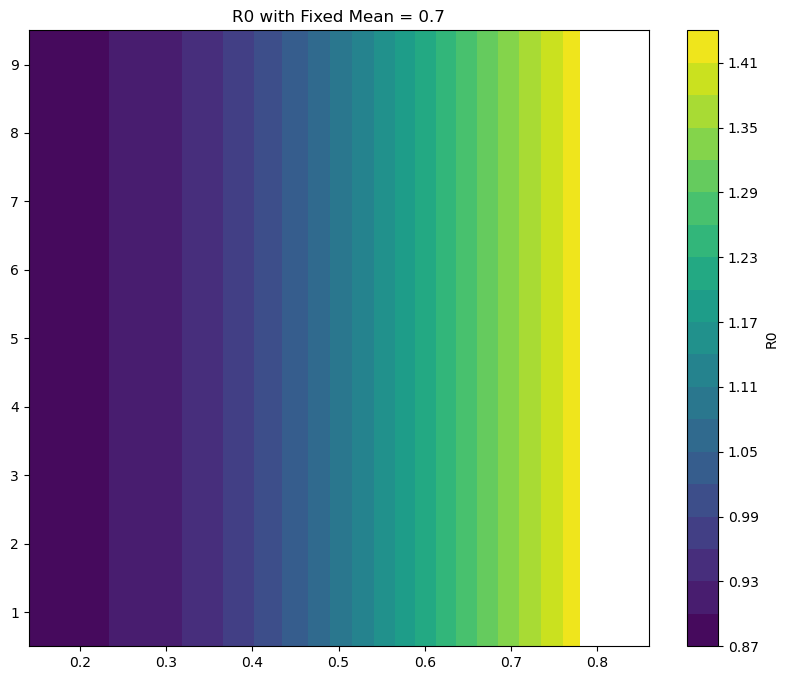

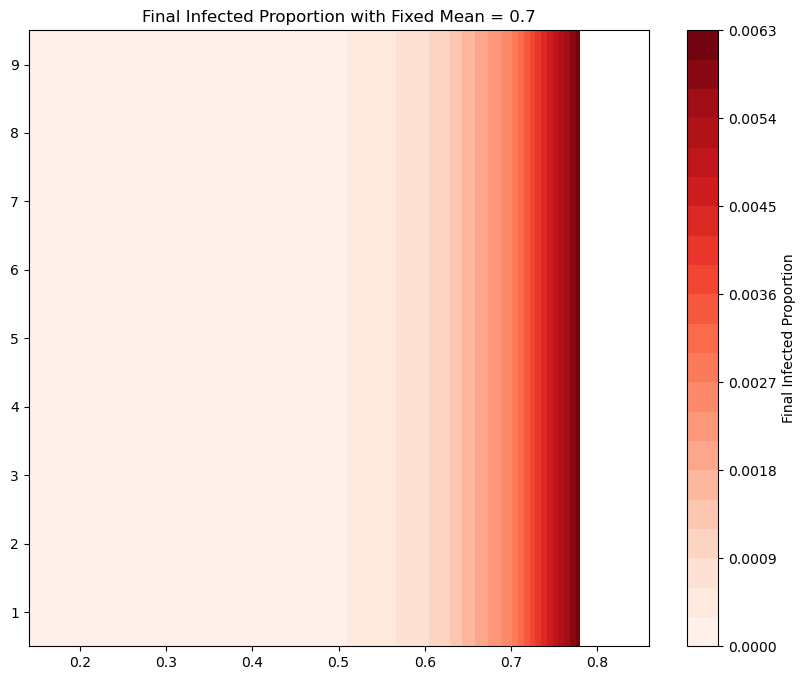

In [ ]:
import jax.numpy as jnp

# Define parameter ranges for the sweep
polarization_range = {"m": 0, "M": 1, "n": 100}  # Min, Max, number of points
homophily_range = {"m": 0.0, "M": 10.0, "n": 100}    # Min, Max, number of points

# Set the fixed mean
fixed_mean = 0.7  # Change this value as needed



# Run the two-parameter sweep
results = sweep_two_parameters(
    model_module=SIRM,                  # The model to use
    param1_name="polarization",         # First parameter to sweep
    param1_range=polarization_range,    # Range for polarization
    param2_name="homophilic_tendency",  # Second parameter to sweep
    param2_range=homophily_range,       # Range for homophily
    custom_base_params=custom_base_params,   # Including our fixed mean
    simulated_days=100,                 # Duration of simulation
    population_size=100,                # Number of population compartments
    use_contact_matrix=True,            # Must be True to see effects of homophily
    batch_size=1000                     # Batch size for processing
)

# Display some information about the results
print(f"Model: {results['model_name']}")
print(f"Parameter 1: {results['parameter_names']['param1']}")
print(f"Parameter 2: {results['parameter_names']['param2']}")
print(f"Shape of results: {results['r0'].shape}")

# Create a simple heatmap visualization of R0 values
import matplotlib.pyplot as plt

# Extract data for visualization
r0_values = results['r0']
param1_grid = results['parameter_grid']['param1_vals']
param2_grid = results['parameter_grid']['param2_vals']

# Create plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(param1_grid, param2_grid, r0_values, 20, cmap='viridis')
plt.colorbar(contour, label='R0')
plt.title(f'R0 with Fixed Mean = {fixed_mean}')

# Save the figure
plt.savefig(f'polarization_homophily_sweep_mean_{fixed_mean}.png')

# Analyze final states
S_final = results['final_state']['S']
I_final = results['final_state']['I']
R_final = results['final_state']['R']

# Create a visualization of the final infected proportion across the parameter space
infected_prop = jnp.sum(I_final, axis=-1) / jnp.sum(I_final + S_final + R_final, axis=-1)

plt.figure(figsize=(10, 8))
contour = plt.contourf(param1_grid, param2_grid, infected_prop, 20, cmap='Reds')
plt.colorbar(contour, label='Final Infected Proportion')
plt.title(f'Final Infected Proportion with Fixed Mean = {fixed_mean}')

# Save the figure
plt.savefig(f'infected_prop_polarization_homophily_mean_{fixed_mean}.png')

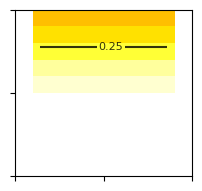

In [19]:
NB = 100
NP = 100

homophilic_tendency = {"m": -5, "M": 5, "n": NB}
pol_range = {"m": 0, "M": 1, "n": NP}
fixed_mean = 0.5
custom_base_params = {
        'beta_M': 0.3,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        #"fixed_mean": fixed_mean,  # Add the fixed mean to params for the param_updater function
        # parameters for SIRM
        'mu_max': 1,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/3,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.025      # Set maximum VR to 0.025
    }


results = sweep_two_parameters(
    model_module=SIRM,                  # The model to use
    param1_name="polarization",         # First parameter to sweep
    param1_range=polarization_range,    # Range for polarization
    param2_name="homophilic_tendency",  # Second parameter to sweep
    param2_range=homophily_range,       # Range for homophily
    custom_base_params=custom_base_params,   # Including our fixed mean
    simulated_days=100,                 # Duration of simulation
    population_size=100,                # Number of population compartments
    use_contact_matrix=True,            # Must be True to see effects of homophily
    batch_size=1000                     # Batch size for processing
)



metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]
    }

fig_R_M = plot_multiple_metrics(
    results, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

0.004082664


c:\users\nel_t\documents\work\projects\pol_hom\src\utils\visualization\common.py:264: UserWarning: The following kwargs were not used by contour: 'rasterized'
  contour = ax.contour(


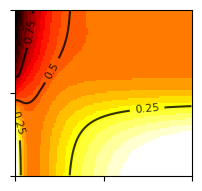

In [ ]:
custom_base_params = {
        'beta_M': 0.3,
        'recovery_rate': 0.1,
        'dT': 1,
        'SPB_exponent': 1,
        'fixed_mean' : 0.1,
        # parameters for SIRM
        'mu_max': 1,
        'mu_min': 0,
        # parameters for SIRT
        'testing_rate_min': 0,        # Set minimum testing rate to 0
        'testing_rate_max': 1/3,      # Set maximum testing rate to 0.5
        # parameters for SIRV
        
        'vaccination_rate_min': 0,        # Set minimum VR to 0
        'vaccination_rate_max':  0.025      # Set maximum VR to 0.025
    }

results_MASKS = sweep_two_parameters(
    model_module=SIRM,
    param1_name="beta_params",           # parameter 1 name
    param1_range=pol_range,    # parameter 1 range
    param2_name="homophilic_tendency",      # parameter 2 name
    param2_range=homophilic_tendency,         # parameter 2 range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)
metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]

    }



fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)

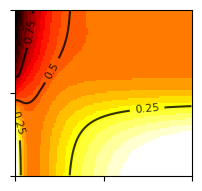

In [31]:
# Define the grid sizes
NP = 100  # Number of polarization values
NH = 100  # Number of homophily values

# Define parameter ranges
pol_range = {"m": 0, "M": 1, "n": NP}
homophily_range = {"m": -5, "M": 5, "n": NH}

# Define custom parameters with a fixed mean value
custom_base_params = {
    'beta_M': 0.3,
    'recovery_rate': 0.1,
    'dT': 1,
    'SPB_exponent': 1,
    'fixed_mean': 0.3,  # The fixed mean value
    # parameters for SIRM
    'mu_max': 1,
    'mu_min': 0,
    # parameters for SIRT
    'testing_rate_min': 0,
    'testing_rate_max': 1/3,
    # parameters for SIRV
    'vaccination_rate_min': 0,
    'vaccination_rate_max': 0.025
}

# Execute the sweep
results_pol_homophily = sweep_two_parameters(
    model_module=SIRM,
    param1_name="polarization",          # First parameter is polarization
    param1_range=pol_range,              # Polarization range
    param2_name="homophilic_tendency",   # Second parameter is homophily
    param2_range=homophily_range,        # Homophily range
    custom_base_params=custom_base_params,
    simulated_days=1000,
    population_size=5,
    batch_size=1000
)

metrics = ["infections"]
cmaps = [discretize_cmaps("hot_r",21)]
contour_values = [[0.25, 0.5, 0.75]]
contour_colors = [['#000','#000','#000']]
final_params={
        'Lx': Lx,  # Figure width in inches
        'Ly': Ly,  # Figure height in inches
        'xticks': [0, 0.5, 1.0],
        'yticks': [-5, 0, 5],
        'xlim': [0, 1],
        'ylim': [-5, 5]

    }



fig_R_M = plot_multiple_metrics(
    results_MASKS, 
    metrics=metrics,
    cmaps=cmaps, 
    contour_values=contour_values,
    contour_colors=contour_colors,
    final_params=final_params
)